In [2]:
!pip install gplearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import graphviz

In [3]:
from gplearn.genetic import SymbolicTransformer
from sklearn.utils import check_random_state
from sklearn.datasets import load_diabetes
import numpy as np

In [4]:
rng = check_random_state(0)
diabetes = load_diabetes()
perm = rng.permutation(diabetes.target.size)
diabetes.data = diabetes.data[perm]
diabetes.target = diabetes.target[perm]

In [6]:
from sklearn.linear_model import Ridge
est = Ridge()
est.fit(diabetes.data[:300, :], diabetes.target[:300])
print(est.score(diabetes.data[300:, :], diabetes.target[300:]))

0.4340571824299352


In [7]:
function_set = ['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                'abs', 'neg', 'inv', 'max', 'min']

In [23]:
### Check genetic programming performance
gp2 = SymbolicTransformer(generations=5, population_size=2000,
                         hall_of_fame=100, n_components=10,
                         function_set=function_set,
                         parsimony_coefficient=0.0005,
                         max_samples=0.9, verbose=1,
                         random_state=0)
gp2.fit(diabetes.data[:300, :], diabetes.target[:300])

gp_features = gp2.transform(diabetes.data)
new_diabetes = np.hstack((diabetes.data, gp_features))



    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    56.27         0.134539        7         0.639078         0.667236     15.07s
   1     9.44         0.387501        7         0.658126         0.740858      7.62s
   2     6.83         0.509685        7         0.685684         0.496074      4.70s
   3     5.88         0.581546       13         0.686234         0.459788      2.41s
   4     7.41         0.603605        7         0.691582         0.493053      0.00s


In [29]:
gp_features.shape

(442, 10)

In [30]:
diabetes.data.shape

(442, 10)

In [10]:
est = Ridge()
est.fit(new_diabetes[:300, :], diabetes.target[:300])
print(est.score(new_diabetes[300:, :], diabetes.target[300:]))

0.5336811804650683


In [12]:
from gplearn.functions import make_function

In [31]:
function_set_2 = ['add', 'sub', 'mul', 'div']
gp3 = SymbolicTransformer(generations=2, population_size=2000,
                         hall_of_fame=100, n_components=10,
                         function_set=function_set_2,
                         parsimony_coefficient=0.0005,
                         max_samples=0.9, verbose=1,
                         random_state=0)

In [32]:
gp3.fit(diabetes.data[:300, :], diabetes.target[:300])

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    25.91         0.128201       15         0.647631         0.363084      2.76s
   1     6.99         0.388311        7         0.680906         0.387211      0.00s


SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div'], generations=2,
                    max_samples=0.9, parsimony_coefficient=0.0005,
                    population_size=2000, random_state=0, verbose=1)

In [35]:
print(gp3._programs[0][3])

add(X3, add(div(X5, sub(X5, X5)), X7))


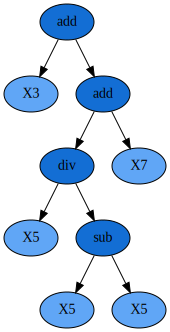

In [36]:
dot_data = gp3._programs[0][3].export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('images/ex3_fig1', format='png', cleanup=True)
graph